In [1]:
#Import all the required libraries
import tensorflow as tf
from tensorflow.keras import layers, models, losses
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
#Get the dataset and print first 5 rows
df = pd.read_csv('TMNIST_Data.csv')
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Extract the features
X = df.drop(['names', 'labels'], axis=1).values

# Extract the labels
y = df['labels'].values

# Reshape the features
X = X.reshape(-1, 28, 28, 1)

# Normalize the pixel
X = X.astype('float32') / 255.0

In [4]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print('X_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (23920, 28, 28, 1)
y_train shape: (23920,)
X_test shape: (5980, 28, 28, 1)
y_test shape: (5980,)


In [5]:
# Preprocess the data
# x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255.0

# x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255.0


# Print the shapes of the training and test sets
print('X_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (23920, 28, 28, 1)
y_train shape: (23920,)
X_test shape: (5980, 28, 28, 1)
y_test shape: (5980,)


In [6]:
# # Define the LeNet model
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [7]:
# # Define the LeNet model1
model1 = models.Sequential()
model1.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(16, (5, 5), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(84, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))
model1.summary()

# Compile the model
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 84)               

In [8]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

# Evaluate the model on the test set
test_loss, test_acc = model1.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

187/187 - 1s - loss: 0.0455 - accuracy: 0.9891 - 962ms/epoch - 5ms/step
Test accuracy: 0.989130437374115
187/187 - 1s - loss: 0.0929 - accuracy: 0.9763 - 741ms/epoch - 4ms/step
Test accuracy: 0.9762541651725769


In [11]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

187/187 [==============================] - 1s 5ms/step


1/1 [==============================] - 0s 25ms/step


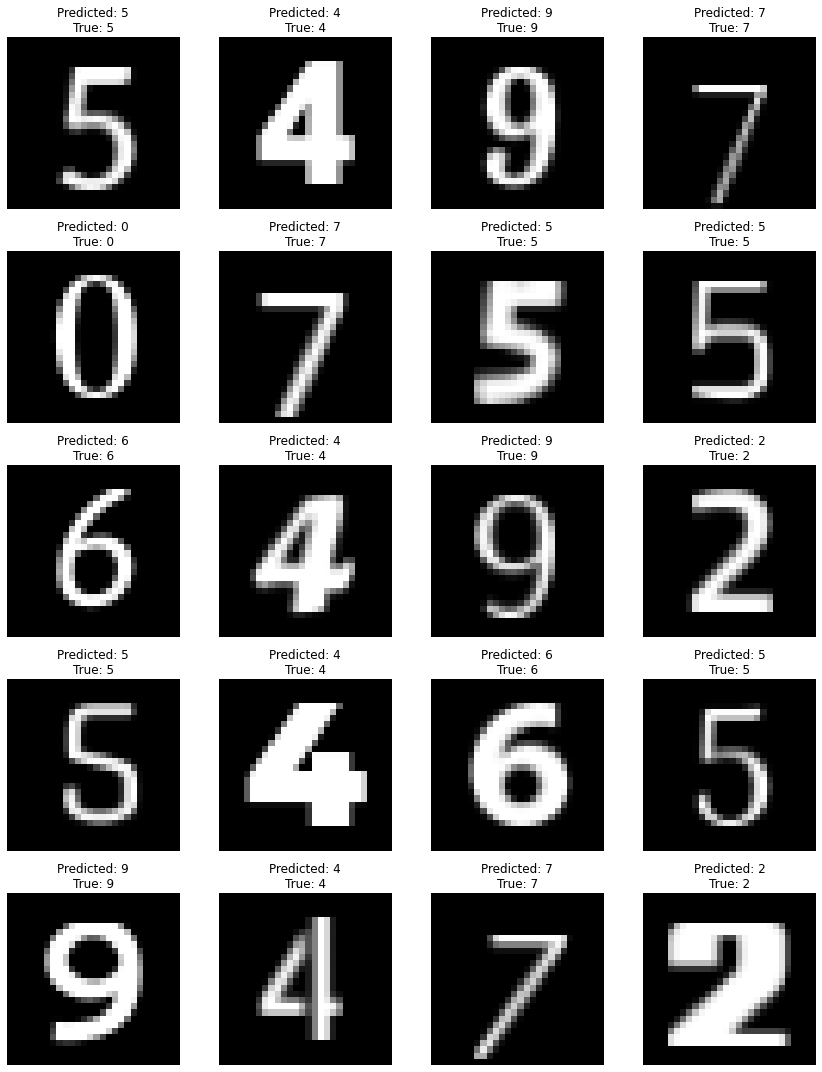

In [12]:
# Get some random test images
num_images = 20
random_indices = np.random.choice(len(x_test), size=num_images, replace=False)
images = x_test[random_indices]
labels = y_test[random_indices]

# Get predictions for the images
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the images with their predicted and actual labels
num_rows = int(np.ceil(num_images / 4))
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, 3*num_rows))
for i in range(num_rows):
    for j in range(4):
        index = i*4+j
        if index < num_images:
            image, predicted_label, label = images[index], predicted_labels[index], labels[index]
            axes[i,j].imshow(image[:,:,0], cmap='gray')
            axes[i,j].set_title(f"Predicted: {predicted_label}\nTrue: {label}")
            axes[i,j].axis('off')
plt.tight_layout()
plt.show()

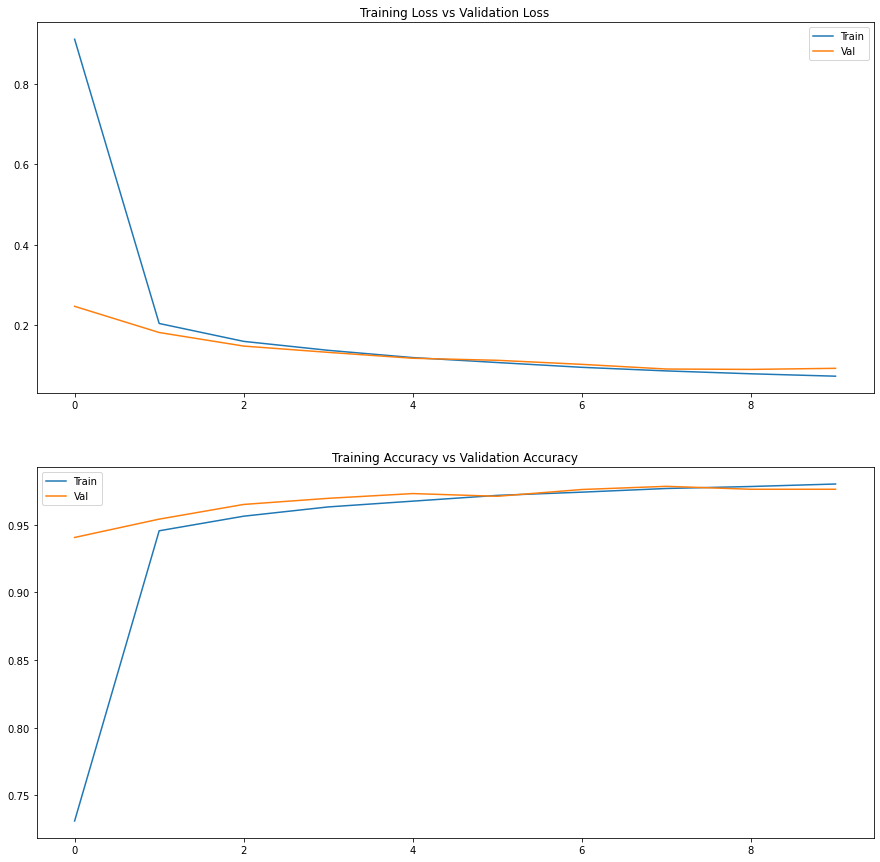

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))  
axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Training Loss vs Validation Loss') 
axs[0].legend(['Train', 'Val'])  
axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy']) 
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].legend(['Train', 'Val'])

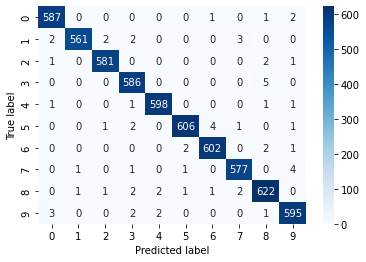

In [15]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

1/1 [==============================] - 0s 91ms/step


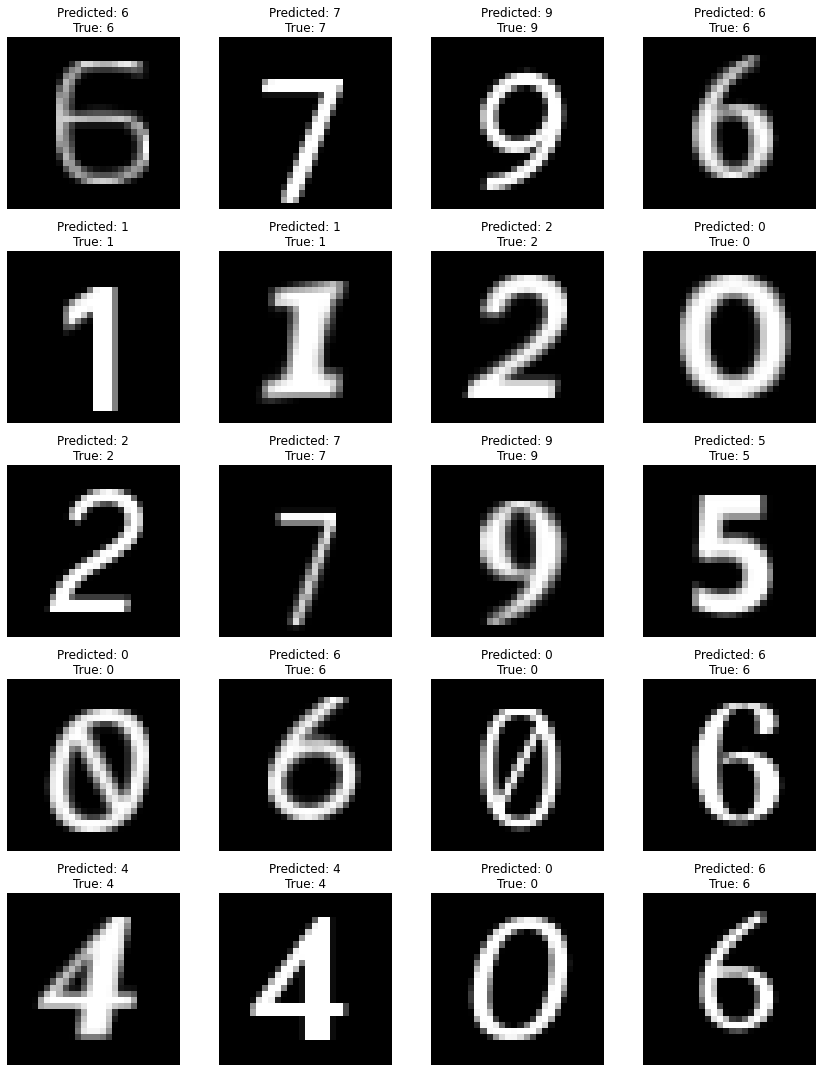

In [16]:
# Get some random test images
num_images = 20
random_indices = np.random.choice(len(x_test), size=num_images, replace=False)
images = x_test[random_indices]
labels = y_test[random_indices]

# Get predictions for the images
predictions = model1.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the images with their predicted and actual labels
num_rows = int(np.ceil(num_images / 4))
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, 3*num_rows))
for i in range(num_rows):
    for j in range(4):
        index = i*4+j
        if index < num_images:
            image, predicted_label, label = images[index], predicted_labels[index], labels[index]
            axes[i,j].imshow(image[:,:,0], cmap='gray')
            axes[i,j].set_title(f"Predicted: {predicted_label}\nTrue: {label}")
            axes[i,j].axis('off')
plt.tight_layout()
plt.show()

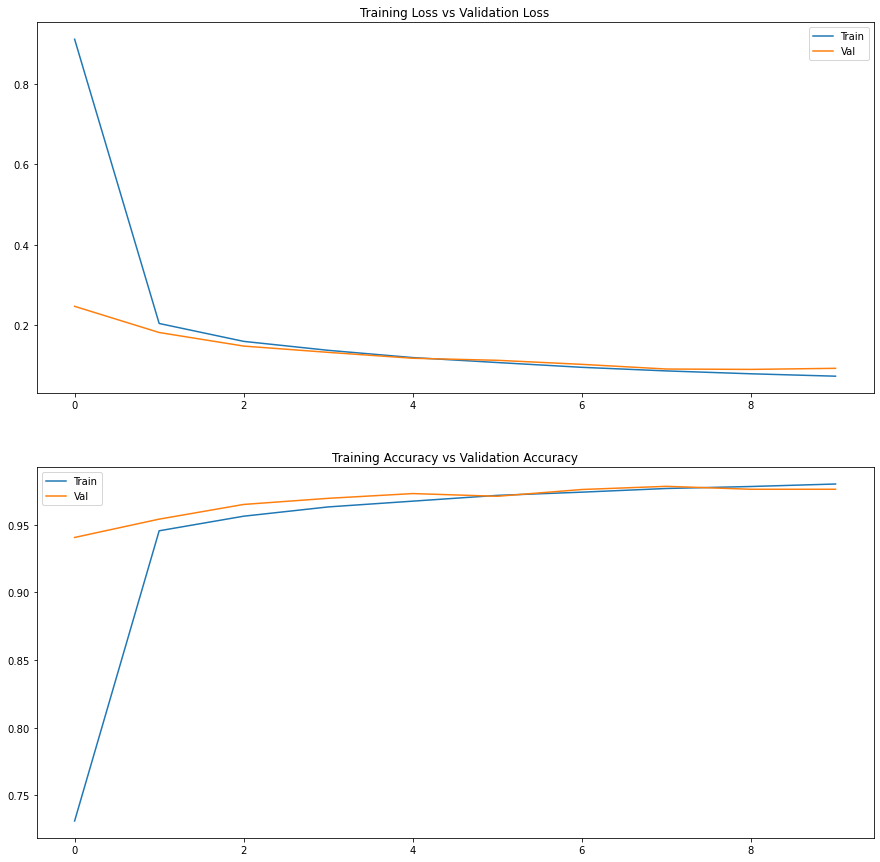

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))  
axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Training Loss vs Validation Loss') 
axs[0].legend(['Train', 'Val'])  
axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy']) 
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].legend(['Train', 'Val'])

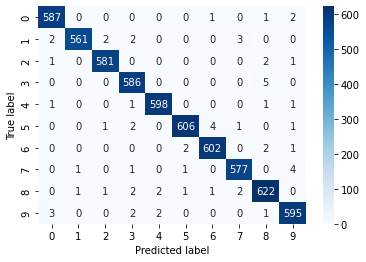

In [18]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### Reference:
#### https://www.kaggle.com/code/niranjanjagannath/lenet-5-architecture-for-mnist-using-tensorflow
#### https://gist.github.com/Moataz-E/6751b1b92fe8f4ff617f10c7f9f9d315